In [12]:
import tensorflow as tf
from agents.MemoryBuffer import MemoryBuffer
from agents.NeuralNetwork import NeuralNetwork
from environment.Simulator import Simulator
from agents.SlidingWindowAgent import SlidingWindowAgent
from environment.Config import ConfigTimeSeries
from environment.BaseEnvironment import TimeSeriesEnvironment
from environment.WindowStateEnvironment import WindowStateEnvironment

#tf.compat.v1.disable_eager_execution()
# Create the agent
# Test on complete Timeseries from SwAT
# for subdir, dirs, files in os.walk("../ts_data/A1Benchmark"):
#     for file in files:
#         if file.find('.csv') != -1:
#             env = TimeSeriesEnvironment(verbose=True, filename="./A1Benchmark/{}".format(file), config=config,
#                                         window=True)
#             env.statefunction = BatchLearning.SlideWindowStateFuc
#             env.rewardfunction = BatchLearning.SlideWindowRewardFuc
#             env.timeseries_cursor_init = BatchLearning.SLIDE_WINDOW_SIZE
#
#             dqn = DDQNWAgent(env.action_space_n, 0.001, 0.9, 1, 0, 0.9)
#             dqn.memory.init_memory(env)
#             simulation = Simulator(11, dqn, env, 5)
#             simulation.run()

config = ConfigTimeSeries(seperator=",", window=1)
env = WindowStateEnvironment(
    TimeSeriesEnvironment(verbose=True, filename="Test/SmallData.csv", config=config, window=True))

dqn = NeuralNetwork(input_dim=env.window_size,
                    input_neurons=env.window_size + 1).keras_model

agent = SlidingWindowAgent(dqn=dqn, memory=MemoryBuffer(max=50000, id="sliding_window"), alpha=0.001,
                           gamma=0.99, epsilon=0.2,
                           epsilon_end=0.0, epsilon_decay=0.9, fit_epoch=2, action_space=2, batch_size=512)

TimeSeries from: Test/SmallData.csv
 Header(labeled):
    value  anomaly
0  12183        0
1  12715        0
2  12736        0 
Header(unlabeled):
    value
0  12183
1  12715
2  12736 
Rows:
 1439
MeanValue:
 11020.08
MaxValue:
 170029
MinValue:
 3594


C:\Users\nils\Anaconda3\envs\master2020\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Successfully loaded Object from memory_sliding_window.obj
Training episode 0 took 2.1532418727874756 seconds Update Target Model
Training episode 1 took 1.0811090469360352 seconds 
Training episode 2 took 1.091083288192749 seconds 
Training episode 3 took 1.1220009326934814 seconds 
Training episode 4 took 1.2227349281311035 seconds 
Training episode 5 took 1.2945399284362793 seconds Update Target Model
Training episode 6 took 1.123999834060669 seconds 
Training episode 7 took 1.1399483680725098 seconds 
Training episode 8 took 1.1589019298553467 seconds 
Training episode 9 took 1.130004644393921 seconds 
Training episode 10 took 1.1370325088500977 seconds Update Target Model
Training episode 11 took 1.1110305786132812 seconds 
Training episode 12 took 1.1439416408538818 seconds 
Training episode 13 took 1.1010565757751465 seconds 
Training episode 14 took 1.1040518283843994 seconds 
Training episode 15 took 1.2346961498260498 seconds Update Target Model
Training episode 16 took 1.2147

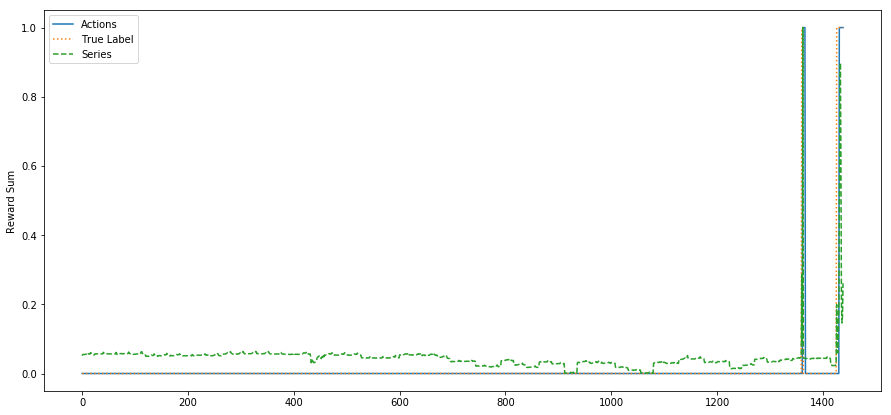

True

In [13]:
simulation = Simulator(51, agent, env, 5)
agent.memory.init_memory(env=env)
simulation.run()